In [1]:
from mbdvv import app, get_atoms
import pyatsol

import pandas as pd
import numpy as np
from collections import OrderedDict

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
ref_values = pd.DataFrame(pyatsol.data).T.rename_axis('symbol')

In [3]:
def last(obj):
    if not isinstance(obj, list):
        return obj
    assert len(obj) == 2
    return obj[-1]

In [4]:
def parse_results(x):
    enes = x.apply(lambda y: y.results['energy'][0]['value'][0] if y.results else np.nan, 1)
    idx = enes.idxmin()
    row = {'symbol': x.symbol[0]}
    if isinstance(idx, tuple):
        data = x.loc[idx].results
        row['vol'] = last(data['volumes'])[0]
        free_atoms = last(data['free_atoms'])
        row['vol_free'] = free_atoms['volumes'][0]
        row['vv_pol'] = last(data['vv_pols'])[0][0]
    else:
        for l in 'vol vol_free vv_pol'.split():
            row[l] = None
    return pd.Series(OrderedDict(row))

df = get_atoms(app.ctx).groupby('Z').apply(parse_results)

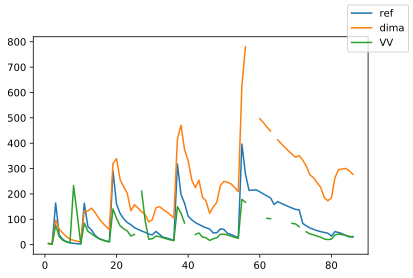

In [5]:
fig, ax = plt.subplots()
ax.plot(
    df.index,
    ref_values.loc[df.symbol]['alpha0(BG)'],
    label='ref',
)
ax.plot(
    df.index,
    (32/225)**(2/3)*df.vol**(4/3),
    label='dima',
)
ax.plot(
    df.index,
    df.vv_pol,
    label='VV',
)
fig.legend()

In [ ]:
df